# Amanjyot Singh (as4899)
# INFO 250-001
# Prof. Kai Li
# August 15th, 2020


______________________________________________________________________________________________________________________

## FINAL

_______________

### 1. Introduction

The dataset I chose is about NBA Players’ heights from the years 1947 to 2017. The
height (in centimeters) of about 4,000 NBA players was collected by Basketball-Reference.com to analyze and develop trends about players’ heights. The data was broken down into two CSV
files, “player_data.csv” which contains the players’ starting year in the NBA and “Player.csv”
which contains the heights for the 4,000 players. I will produce line plots and bar graphs to
compare the starting heights per year. From that data, I can check to see if newer players start
out taller or shorter than previous players. To visualize the datasets, I will either use Jupyter Notebook and data frames using Python. I was able to
find this data set on Kaggy.com. The original creator of the post took the data from basketball-
references, which is a site commonly known to keep track of basketball analytics and player
statistics. From Kaggy, I was able to take two .csv files that contain the data I need.

### 2. Problem Definition

There is always a common debate on whether recent NBA rookies, also known as
players on their starting years are taller than previous rookies. This debate started to become
more apparent once fans saw point guards such as Lonzo Ball, Ben Simmons, and Luka Doncic.
The names stated previously are players at the Point Guard position who are much taller from
others who play the same position. Thus, the media and fans sparked up this debate. The
objective of this is to analyze NBA players and their heights during their first year to determine
whether or not the average height is greater or less than prior rookies. If the data is following
an increasing trend, I can conclude that NBA rookies are taller than prior rookies. However, if
the trend is following a negative direction, I can conclude NBA rookies now are shorter than
prior NBA rookies. Thus, giving an answer to this common debate. This can give sports analysts
a more analytical approach to their debate and can help them support their points towards this
debate. Therefore, my target audience is sports analysts.
Several questions could be asked through my data visualization. Which 10 years had the tallest average starting heights? Which 10 years had the shortest average starting heights? Around what period did the increase or decrease of average starting heights begin to show? What could cause this sudden change of heights? These are some questions that my visualization should answer. As stated before, I will use many line and bar graphs to answer these questions and follow trends to determine whether the starting heights of players are increasing or decreasing. If it is increasing, we can assume that the average starting height is taller. If it is decreasing, we can assume that the average starting height is shorter. Thus, the data variables I will use for the observations are height in centimeters and years as these two attributes are the most important for my analysis.

### 3. Acquiring and Loading Data

In [31]:
# import the following libraries for each data analysis task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Creating a dataframe for Players and storing it in a varaiable named df1.

In [32]:
df1 = pd.read_csv("/Users/Aman/Desktop/school/Year 2/INFO 250/Project/Players.csv")

Creating a dataframe for player_data and storing it in variable called df2. 

In [33]:
df2 = pd.read_csv("/Users/Aman/Desktop/school/Year 2/INFO 250/Project/player_data.csv")

### 4. Wrangling and Cleansing Data

From the dataset df1, I will only be using the data about heights and player names. Thus, I will drop the remaining columns to only leave the two columns, "height" and "Player". As stated in the previous step, I will also rename the "Player" column to "name" to match the "name" column in the dataset df2.

In [34]:
updateddf1 = df1.drop(["Unnamed: 0", "weight", "collage", "born", "birth_city", "birth_state"], axis = 1)
updateddf1.rename(columns = {"Player" : "name"}, inplace = True)

The first dataframe now only has columns, name and height, which is the only data I care about in this dataframe. Now, I am going to drop the rows with duplicate name values to prevent duplicates. 

In [35]:
updateddf1.head()

,name,height
0,Curly Armstrong,180.0
1,Cliff Barker,188.0
2,Leo Barnhorst,193.0
3,Ed Bartels,196.0
4,Ralph Beard,178.0


In [36]:
updateddf1.drop_duplicates(subset="name", keep = False, inplace = True)

From the dataset df2, I will only be using the data about starting years and player names. Thus, I will drop the remaining columns to only leave the two columns, "year_start" and "name". As stated in the previous step, the columns for player names in each dataset df1 and df2 are now both called "name".

In [37]:
updateddf2 = df2.drop(["year_end", "position", "height", "weight", "birth_date", "college"], axis = 1)

The second dataframe now only has columns, name and year_start, which is the only data I care about in this dataframe.

In [38]:
updateddf2.head()

,name,year_start
0,Alaa Abdelnaby,1991
1,Zaid Abdul-Aziz,1969
2,Kareem Abdul-Jabbar,1970
3,Mahmoud Abdul-Rauf,1991
4,Tariq Abdul-Wahad,1998


Now, I am going to drop the rows with duplicate name values to prevent duplicates again.

In [39]:
updateddf2.drop_duplicates(subset="name", keep = False, inplace = True)

I will be merging the "name" columns in each dataset df1 and df2 as well as the data about height from df1 and year_start from df2 into one dataframe called "mergedDF". This will allow mw to analyze the data in one single dataframe.

In [40]:
mergedDF = pd.merge(updateddf1, updateddf2, how = 'inner', on = 'name')

First 5 rows of the data:

In [41]:
mergedDF.head()

,name,height,year_start
0,Curly Armstrong,180.0,1949
1,Cliff Barker,188.0,1950
2,Leo Barnhorst,193.0,1950
3,Ed Bartels,196.0,1950
4,Ralph Beard,178.0,1950


### 5. Implent the Visualization

In order to examine if there is an overall increasing or decreasing trend of players' starting heights from 1947 to 2017, I will create a new dataframe containing information about the year_start and average height of each year. To obtain the average height of each year, I will use the mean() function. By having these two columns, the year_start will be our x-axis and the average height will be our y-axis in our plots so I can analyze a trend.

In [42]:
groupedDF = mergedDF.groupby('year_start', as_index = False).height.mean()
groupedDF.head()

,year_start,height
0,1947,192.235294
1,1948,191.071429
2,1949,192.177778
3,1950,190.872727
4,1951,194.680000


Now that I have created our dataframe of year_start and average height, I will create a line plot to analyze if there are any increasing or decreasing trends of starting heights throughout the years from 1947 to 1961.

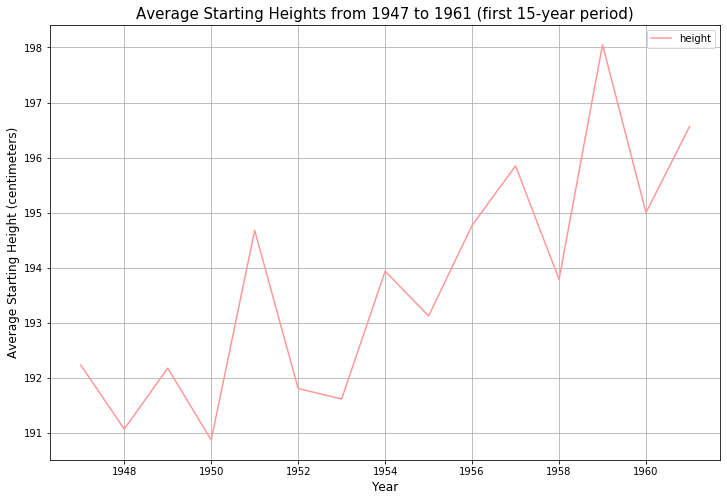

In [61]:
# plot the year_start and height data from 1947-1961 (in 2-year interval)
groupedDF[0:15].plot.line(color = '#ff9999', figsize = (12, 8), x = "year_start", y = "height")
# label the title 'Average Starting Heights from 1947 to 1961'
plt.title("Average Starting Heights from 1947 to 1961 (first 15-year period)", fontsize="15")
# label the x-axis 'Year'
plt.xlabel("Year", fontsize="12")
# label the y-axis 'Average Starting Height (centimeters)'
plt.ylabel("Average Starting Height (centimeters)", fontsize="12")
# include grid on plot
plt.grid()
# show plot
plt.show()

After plotting the relationship between Year and Average Starting Height (centimeters), I can see that there is a generally increasing trend between the average starting height and each year for the first 15-year period from 1947-1961.

The same process will now follow for 1962 to 1976.

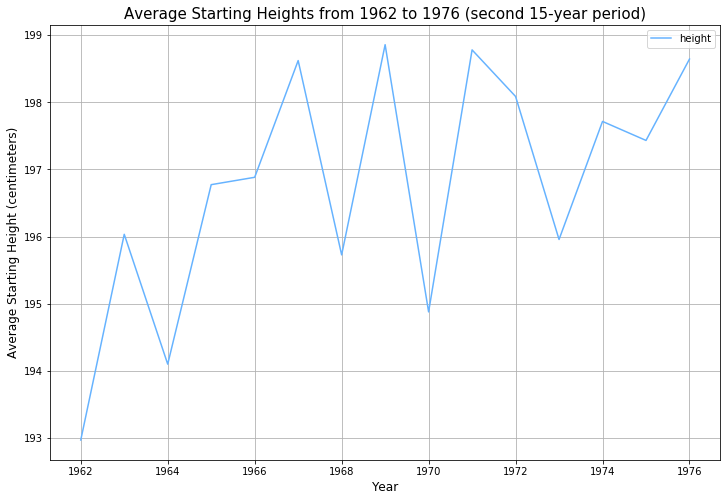

In [62]:
# plot the year_start and height data from 1962-1976 (in 2-year interval)
groupedDF[15:30].plot.line(color = '#66b3ff', figsize = (12, 8), x = "year_start", y = "height")
# label the title 'Average Starting Heights from 1962 to 1976'
plt.title("Average Starting Heights from 1962 to 1976 (second 15-year period)", fontsize="15")
# label the x-axis 'Year'
plt.xlabel("Year", fontsize="12")
# label the y-axis 'Average Starting Height (centimeters)'
plt.ylabel("Average Starting Height (centimeters)", fontsize="12")
# include grid on plot
plt.grid()
# show plot
plt.show()

After plotting the relationship between Year and Average Starting Height (centimeters), I can see that there is a generally increasing trend between the average starting height and each year for the second 15-year period from 1962-1976.

Once again, following the same process for 1977 to 1991. 

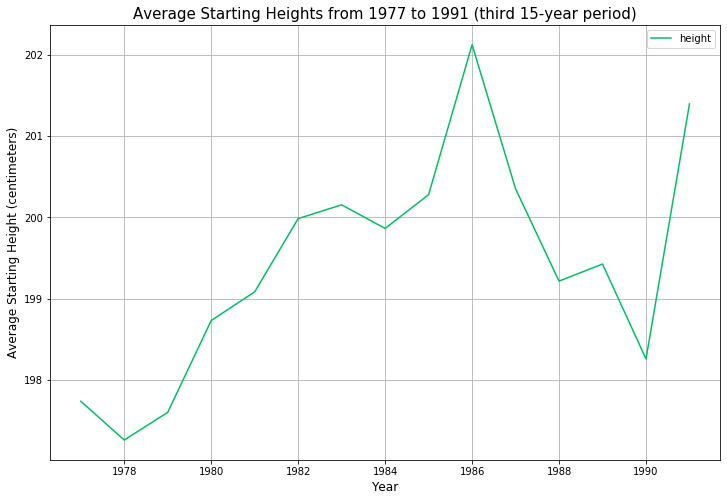

In [63]:
# plot the year_start and height data from 1977-1991 (in 2-year interval)
groupedDF[30:45].plot.line(color = '#00c060', figsize = (12, 8), x = "year_start", y = "height")
# label the title 'Average Starting Heights from 1977 to 1991'
plt.title("Average Starting Heights from 1977 to 1991 (third 15-year period)", fontsize="15")
# label the x-axis 'Year'
plt.xlabel("Year", fontsize="12")
# label the y-axis 'Average Starting Height (centimeters)'
plt.ylabel("Average Starting Height (centimeters)", fontsize="12")
# include grid on plot
plt.grid()
# show plot
plt.show()

After plotting the relationship between Year and Average Starting Height (centimeters), I can see that there is a generally increasing trend with a slight downfall between the average starting height and each year for the third 15-year period from 1977-1991.

Same thing following for 1992 to 2006. 

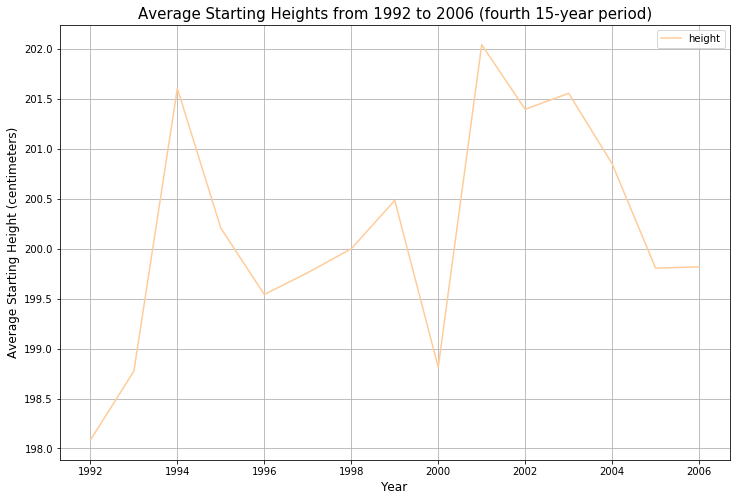

In [64]:
# plot the year_start and height data from 1992-2006 (in 2-year interval)
groupedDF[45:60].plot.line(color = '#ffcc99', figsize = (12, 8), x = "year_start", y = "height")
# label the title 'Average Starting Heights from 1992 to 2006'
plt.title("Average Starting Heights from 1992 to 2006 (fourth 15-year period)", fontsize="15")
# label the x-axis 'Year'
plt.xlabel("Year", fontsize="12")
# label the y-axis 'Average Starting Height (centimeters)'
plt.ylabel("Average Starting Height (centimeters)", fontsize="12")
# include grid on plot
plt.grid()
# show plot
plt.show()

After plotting the relationship between Year and Average Starting Height (centimeters), I can see that there is a generally increasing trend with a slight downfall between the average starting height and each year for the fourth 15-year period from 1992-2006.

One more time for 2007 to 2017. 

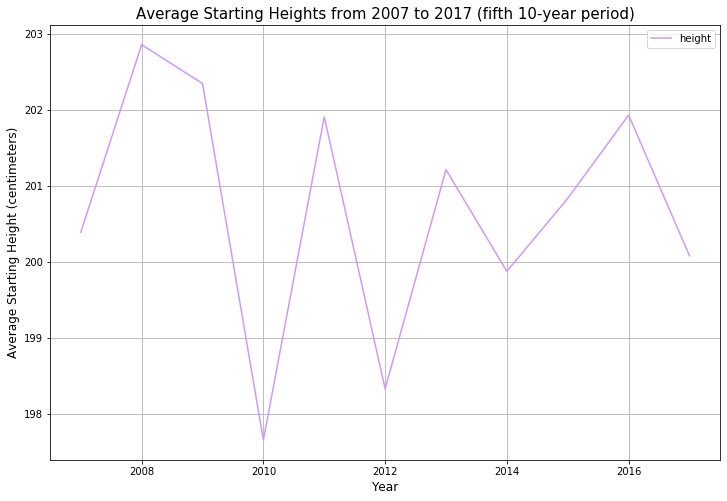

In [65]:
# plot the year_start and height data from 2007-2017 (in 2-year interval)
groupedDF[60:71].plot.line(color = '#cc99ff', figsize = (12, 8), x = "year_start", y = "height")
# label the title 'Average Starting Heights from 2007 to 2017'
plt.title("Average Starting Heights from 2007 to 2017 (fifth 10-year period)", fontsize="15")
# label the x-axis 'Year'
plt.xlabel("Year", fontsize="12")
# label the y-axis 'Average Starting Height (centimeters)'
plt.ylabel("Average Starting Height (centimeters)", fontsize="12")
# include grid on plot
plt.grid()
# show plot
plt.show()

After plotting the relationship between Year and Average Starting Height (centimeters), I can see that there is a generally increasing trend with a slight downfall between the average starting height and each year for the fifth 10-year period from 2007-2017.

Now that I have created the dataframe of year_start and average height, I will create a line plot to analyze if there are any increasing or decreasing trends of starting heights throughout the years from 1947 to 2017.

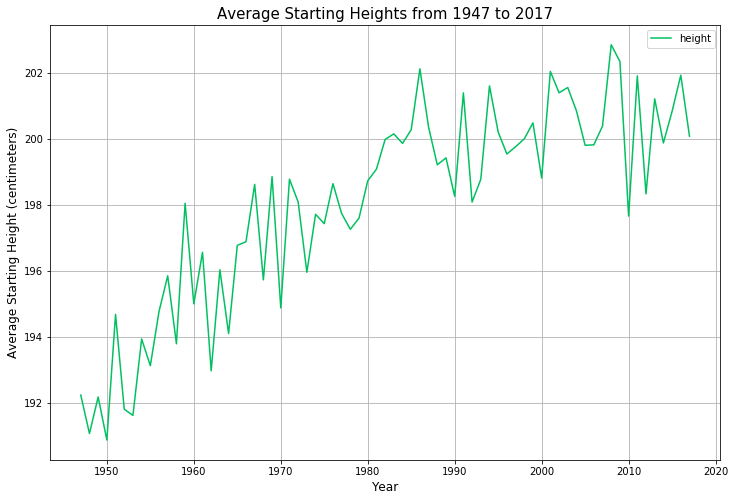

In [43]:
# plot the year_start and height data from 1947-2017 (in 10-year interval)
groupedDF.plot.line(color = '#00c060', figsize = (12, 8), x = "year_start", y = "height")
# label the title 'Average Starting Heights from 1947 to 2017'
plt.title("Average Starting Heights from 1947 to 2017", fontsize="15")
# label the x-axis 'Year'
plt.xlabel("Year", fontsize="12")
# label the y-axis 'Average Starting Height (centimeters)'
plt.ylabel("Average Starting Height (centimeters)", fontsize="12")
# include grid on plot
plt.grid()
# show plot
plt.show()

After plotting the relationship between Year and Average Starting Height (centimeters), I can see that there is a generally increasing trend between the average starting height for each year.

In order to identify which years are the top 10 years with the tallest Average Starting Heights, I will create a new dataframe containing the 10 years with the 10 tallest average starting heights. For better accuracy, I will also round all heights to two decmial places.

In [44]:
# create a new dataframe to show the top 10 years with the tallest average starting height
top10Tallest = groupedDF.nlargest(10, 'height')
# round heights to two decimal places
roundedTop10Tallest = top10Tallest.round({"height" : 2})
# show top 10 years with tallest average starting heights
roundedTop10Tallest.head()

,year_start,height
61,2008,202.85
62,2009,202.34
39,1986,202.12
54,2001,202.04
69,2016,201.93


Now that I have created our dataframe of the top 10 years with the tallest heights, I will create a bar plot to see around which era the tallest heights were in.

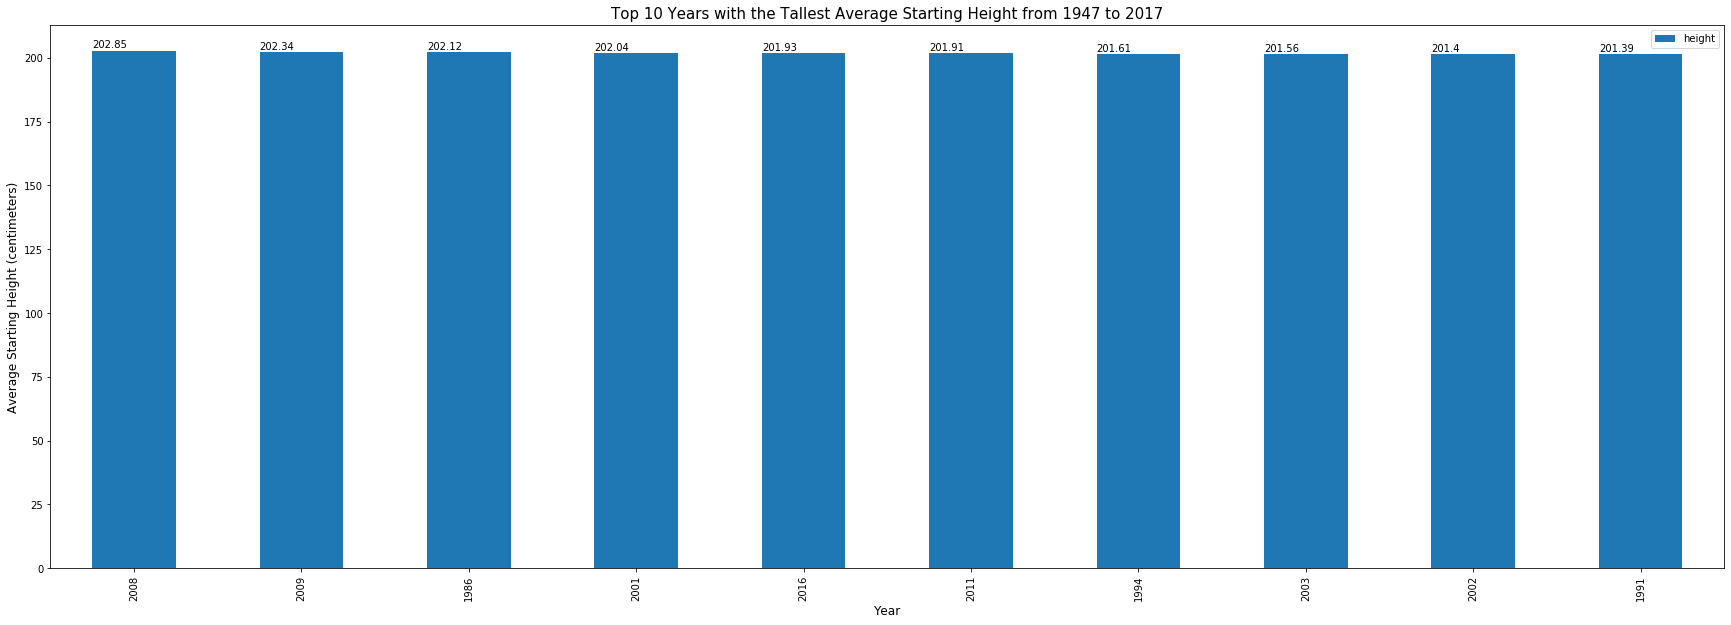

In [45]:
# plot the top 10 years with the tallest average starting height from 1947-2017 
top10Tallestplot = roundedTop10Tallest.plot.bar(x = "year_start", y = "height", figsize = (30, 10))
# label the title 'Top 10 Years with the Tallest Average Starting Height from 1947 to 2017'
plt.title("Top 10 Years with the Tallest Average Starting Height from 1947 to 2017", fontsize="15")
# label the x-axis 'Year'
plt.xlabel("Year", fontsize="12")
# label the y-axis 'Average Starting Height (centimeters)'
plt.ylabel("Average Starting Height (centimeters)", fontsize="12")
# include exact average starting height (in centimeters) for each year in top 10 years
for p in top10Tallestplot.patches:
    top10Tallestplot.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.005))
# show plot
plt.show()

Although I was told to use another graph to display this, I couldn't necessarily replace this. Instead, I made a scatterplot with the same data to perhaps show the user of another visualization method. The reader can see the same x/y values through the dots and ticks I made. The reason why the scatterplot below is so large is to ensure that the tick labels can fit correctly. This same method will be applied to the top 10 smallest years as well. 

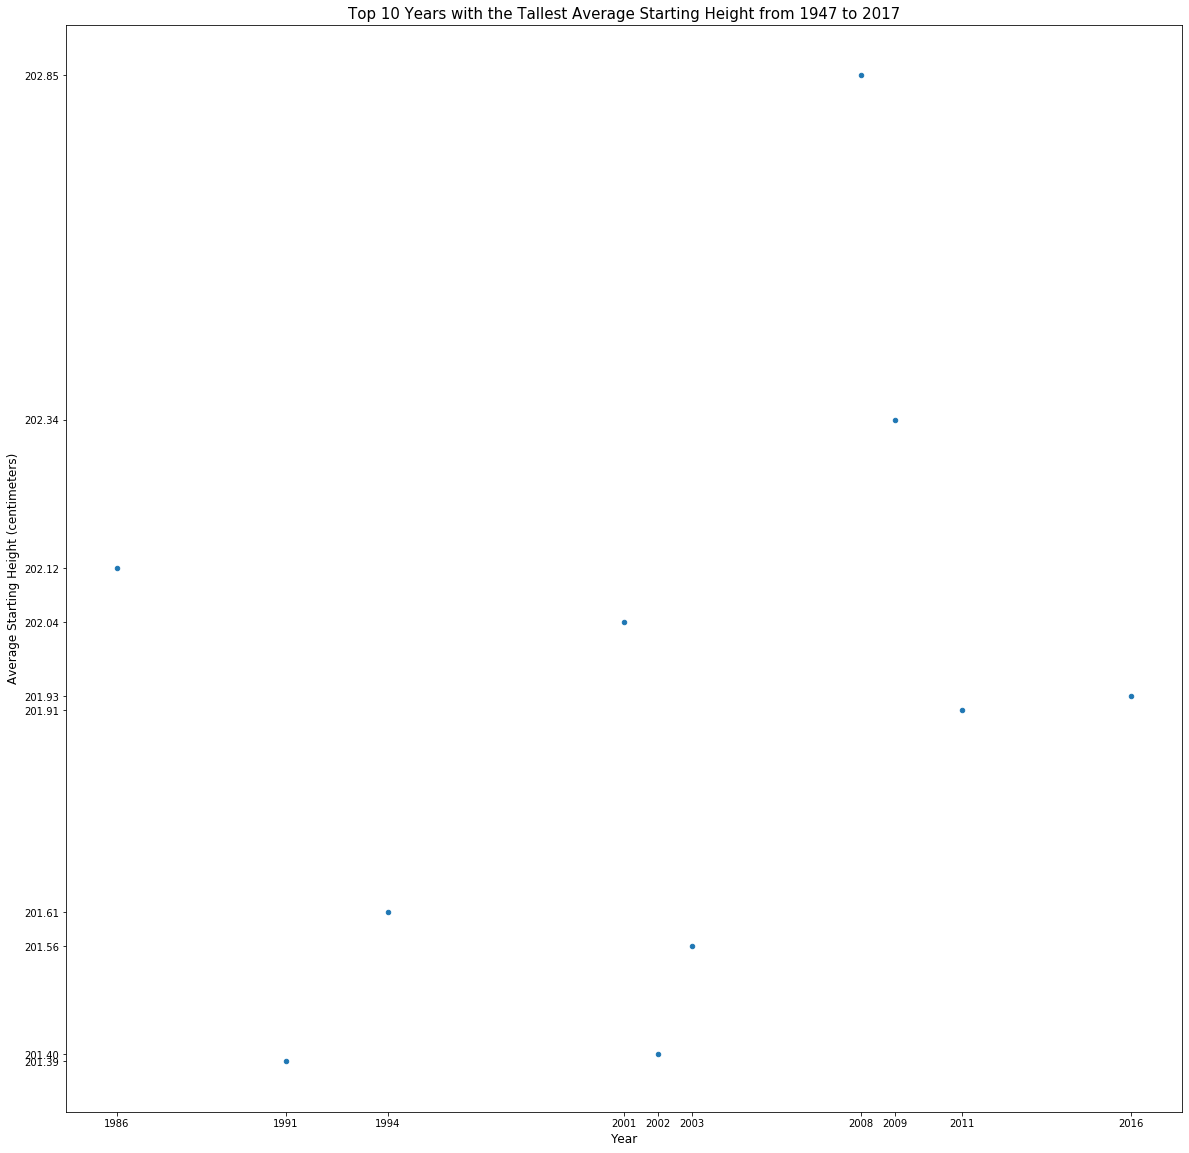

In [55]:
# plot the top 10 years with the tallest average starting height from 1947-2017 
top10Tallestplot = roundedTop10Tallest.plot.scatter(x = "year_start", y = "height", figsize = (20, 20), xticks = roundedTop10Tallest['year_start'], yticks = roundedTop10Tallest["height"])
# label the title 'Top 10 Years with the Tallest Average Starting Height from 1947 to 2017'
plt.title("Top 10 Years with the Tallest Average Starting Height from 1947 to 2017", fontsize="15")
# label the x-axis 'Year'
plt.xlabel("Year", fontsize="12")
# label the y-axis 'Average Starting Height (centimeters)'
plt.ylabel("Average Starting Height (centimeters)", fontsize="12")
# include exact average starting height (in centimeters) for each year in top 10 years
#for p in top10Tallestplot.patches:
    #top10Tallestplot.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.005))
# show plot
plt.show()

After plotting the top 10 years with the tallest Average Starting Heights (in centimeters), I can see that the 10 tallest average starting heights were for players who played in the NBA in recent years/decades. The top 10 years with the tallest heights were between 1986 to 2019, which were all within the 4 most recent decades.

In order to identify which years are the top 10 years with the shortest Average Starting Heights, I will create a new dataframe containing the 10 years with the 10 shortest average starting heights. For better accuracy, I will also round all heights to two decmial places.

In [56]:
# create a new dataframe to show the top 10 years with the shortest average starting height
top10Shortest = groupedDF.nsmallest(10, 'height')
# round heights to two decimal places
roundedTop10Shortest = top10Shortest.round({"height" : 2})
# show top 10 years with shortest average starting heights
roundedTop10Shortest.head()

,year_start,height
3,1950,190.87
1,1948,191.07
6,1953,191.62
5,1952,191.81
2,1949,192.18


Now that I have created our dataframe of the top 10 years with the shortest heights, I will create a bar plot to see around which era the shortest heights were in.

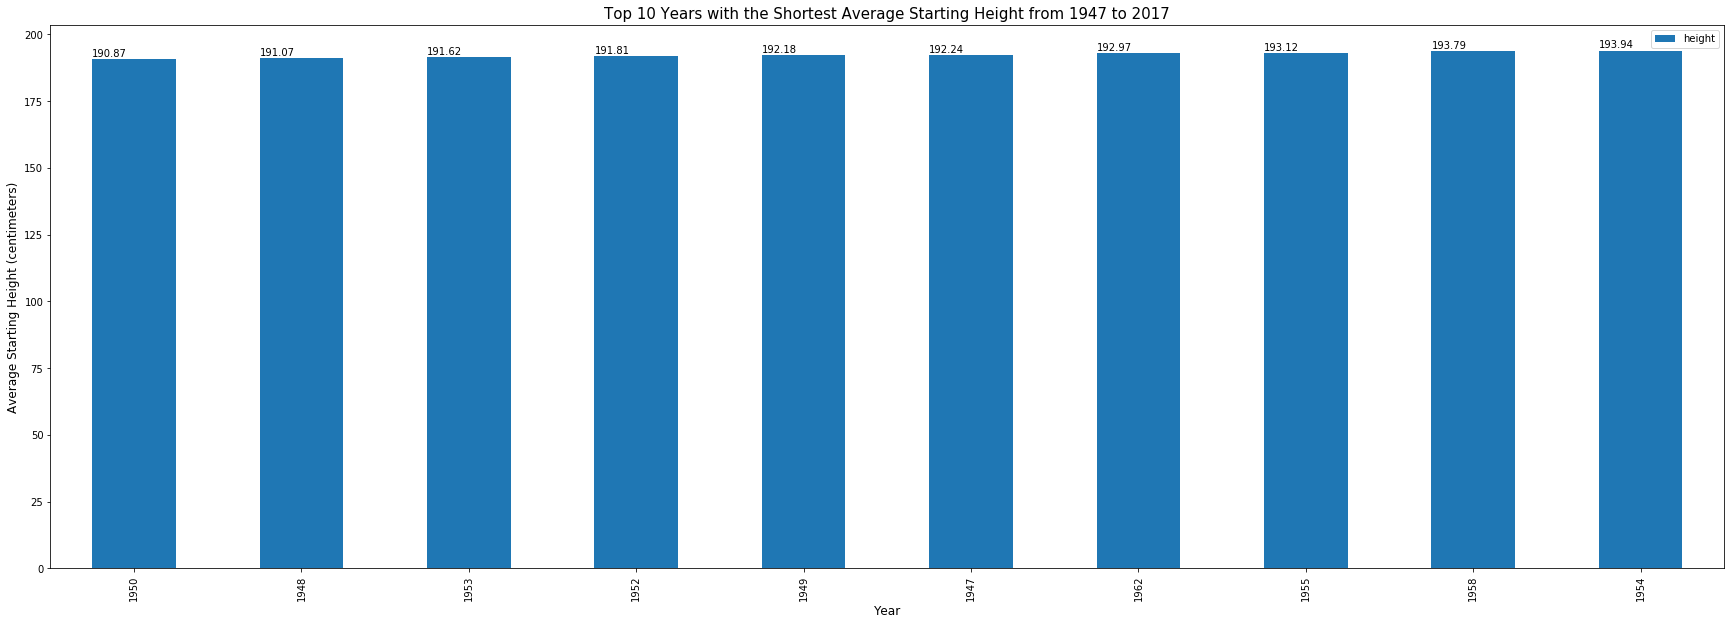

In [58]:
# plot the top 10 years with the shortest average starting height from 1947-2017 
top10Shortestplot = roundedTop10Shortest.plot.bar(x = "year_start", y = "height", figsize = (30, 10))
# label the title 'Top 10 Years with the Shortest Average Starting Height from 1947 to 2017'
plt.title("Top 10 Years with the Shortest Average Starting Height from 1947 to 2017", fontsize="15")
# label the x-axis 'Year'
plt.xlabel("Year", fontsize="12")
# label the y-axis 'Average Starting Height (centimeters)'
plt.ylabel("Average Starting Height (centimeters)", fontsize="12")
# include exact average starting height (in centimeters) for each year in top 10 years
for p in top10Shortestplot.patches:
    top10Shortestplot.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.005))
# show plot
plt.show()

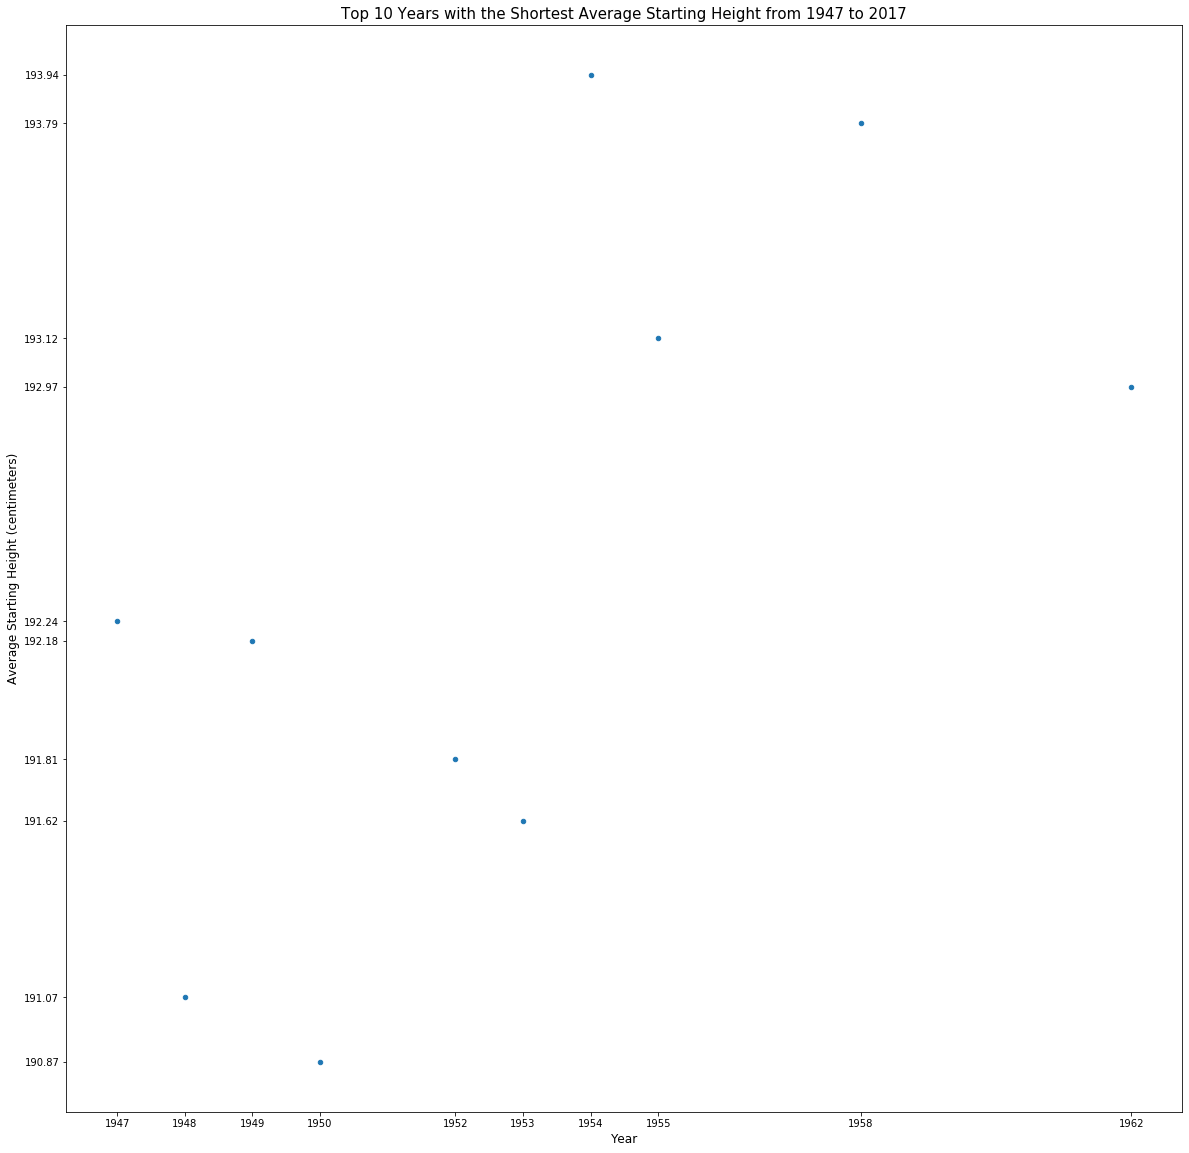

In [60]:
# plot the top 10 years with the shortest average starting height from 1947-2017 
top10Shortestplot = roundedTop10Shortest.plot.scatter(x = "year_start", y = "height", figsize = (20, 20), xticks = roundedTop10Shortest['year_start'], yticks = roundedTop10Shortest["height"])
# label the title 'Top 10 Years with the Shortest Average Starting Height from 1947 to 2017'
plt.title("Top 10 Years with the Shortest Average Starting Height from 1947 to 2017", fontsize="15")
# label the x-axis 'Year'
plt.xlabel("Year", fontsize="12")
# label the y-axis 'Average Starting Height (centimeters)'
plt.ylabel("Average Starting Height (centimeters)", fontsize="12")
# include exact average starting height (in centimeters) for each year in top 10 years
#for p in top10Tallestplot.patches:
    #top10Tallestplot.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.005))
# show plot
plt.show()

After plotting the top 10 years with the shortest Average Starting Heights (in centimeters), I can see that the 10 shortest average starting heights were for players who played in the NBA in earlier years/decades. The top 10 years with the shortest heights were between 1947 to 1962, which were all within the 2 oldest decades between 1947 and 2017.

### 6. References

Full Link for CSV files: https://www.kaggle.com/drgilermo/nba-players-stats?select=player_data.csv

Data scraped from: 
http://www.basketball-reference.com 

Corrected dataset from:
https://www.kaggle.com/abidrahman